# ARIMA MODEL FOR INDIAN COVID-19 DATASET

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading the Data 

In [2]:
files = { 'National_data': 'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/master/COVID-DataTimeSeries(India)/nation_level_daily.csv'}

In [74]:
National_data = pd.read_csv(files['National_data'])
National_data.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


In [4]:
National_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             190 non-null    object
 1   Daily Confirmed  190 non-null    int64 
 2   Total Confirmed  190 non-null    int64 
 3   Daily Recovered  190 non-null    int64 
 4   Total Recovered  190 non-null    int64 
 5   Daily Deceased   190 non-null    int64 
 6   Total Deceased   190 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 10.5+ KB


## 1. Data organisation

In [5]:
National_data['Date'] = National_data['Date'].apply(lambda x: x+' 2020')

In [6]:
National_data.head(100)

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January 2020,1,1,0,0,0,0
1,31 January 2020,0,1,0,0,0,0
2,01 February 2020,0,1,0,0,0,0
3,02 February 2020,1,2,0,0,0,0
4,03 February 2020,1,3,0,0,0,0
...,...,...,...,...,...,...,...
95,04 May 2020,3656,46434,1082,12845,103,1566
96,05 May 2020,2971,49405,1295,14140,128,1694
97,06 May 2020,3602,53007,1161,15301,91,1785
98,07 May 2020,3344,56351,1475,16776,104,1889


In [7]:
National_data['Date']=pd.to_datetime(National_data['Date'])
National_data.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,1,1,0,0,0,0
1,2020-01-31,0,1,0,0,0,0
2,2020-02-01,0,1,0,0,0,0
3,2020-02-02,1,2,0,0,0,0
4,2020-02-03,1,3,0,0,0,0


In [8]:
Confirmed_India= National_data[['Date', 'Daily Confirmed', 'Total Confirmed']]
Confirmed_India.head()

,Date,Daily Confirmed,Total Confirmed
0,2020-01-30,1,1
1,2020-01-31,0,1
2,2020-02-01,0,1
3,2020-02-02,1,2
4,2020-02-03,1,3


## 3. Data Visualisation

Text(0.5, 0, 'Dates')

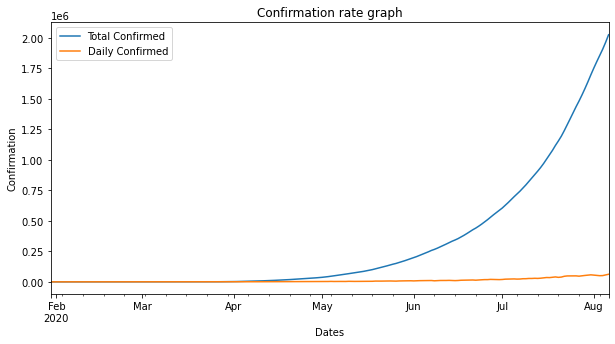

In [9]:
Confirmed_India.plot(x='Date', y=['Total Confirmed','Daily Confirmed'], figsize=[10,5])
plt.title('Confirmation rate graph')
plt.ylabel('Confirmation', fontsize=10);
plt.xlabel('Dates', fontsize=10)

Text(0.5, 0, 'Dates')

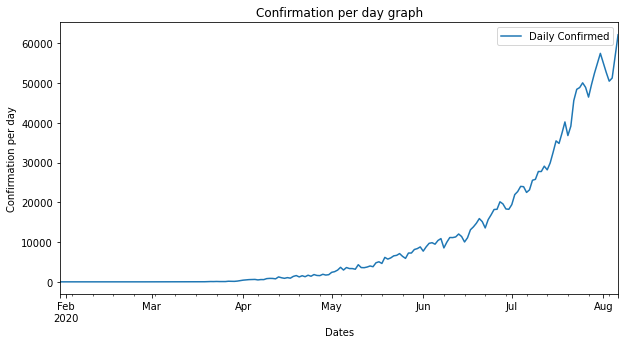

In [10]:
Confirmed_India.plot(x='Date', y=['Daily Confirmed'], figsize=[10,5])
plt.title('Confirmation per day graph')
plt.ylabel('Confirmation per day', fontsize=10);
plt.xlabel('Dates', fontsize=10)

In [11]:
Recovered_India= National_data[['Date', 'Daily Recovered', 'Total Recovered']]
Recovered_India.head()

,Date,Daily Recovered,Total Recovered
0,2020-01-30,0,0
1,2020-01-31,0,0
2,2020-02-01,0,0
3,2020-02-02,0,0
4,2020-02-03,0,0


Text(0.5, 0, 'Dates')

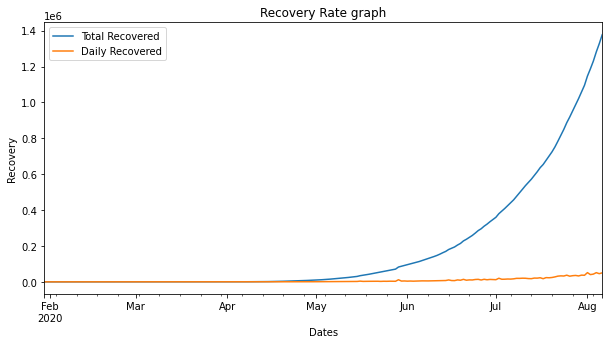

In [12]:
Recovered_India.plot(x='Date', y=['Total Recovered','Daily Recovered'], figsize=[10,5])
plt.title('Recovery Rate graph')
plt.ylabel('Recovery', fontsize=10);
plt.xlabel('Dates', fontsize=10)

Text(0.5, 0, 'Dates')

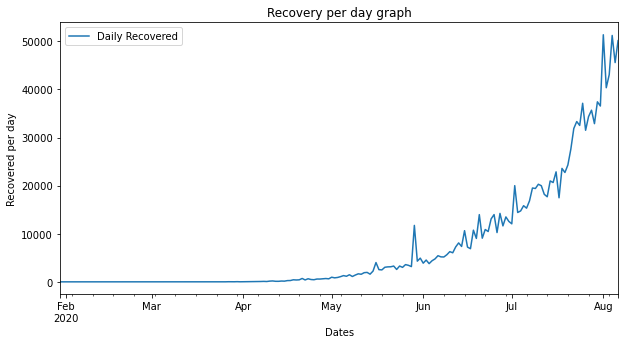

In [13]:
Recovered_India.plot(x='Date', y=['Daily Recovered'], figsize=[10,5])
plt.title('Recovery per day graph')
plt.ylabel('Recovered per day', fontsize=10);
plt.xlabel('Dates', fontsize=10)

Text(0.5, 0, 'Dates')

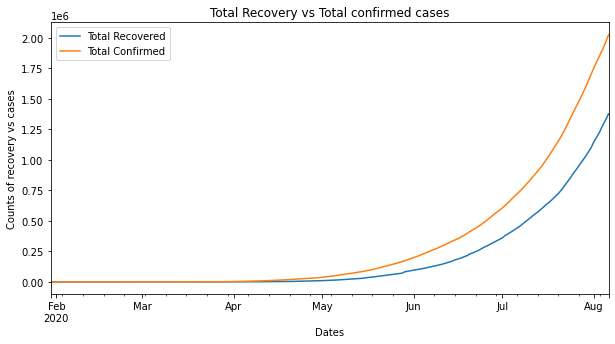

In [14]:
National_data.plot(x='Date', y=['Total Recovered', 'Total Confirmed'], figsize=[10,5])
plt.title('Total Recovery vs Total confirmed cases')
plt.ylabel('Counts of recovery vs cases', fontsize=10);
plt.xlabel('Dates', fontsize=10)

Text(0.5, 0, 'Dates')

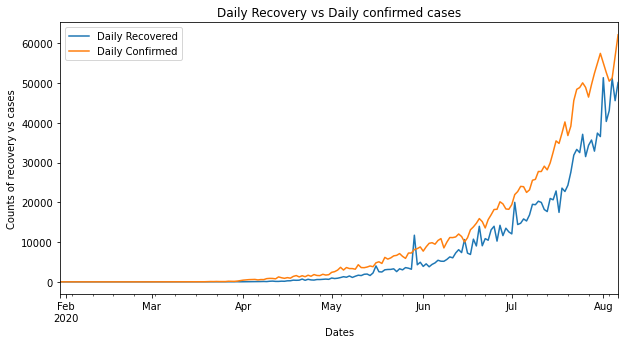

In [15]:
National_data.plot(x='Date', y=['Daily Recovered', 'Daily Confirmed'], figsize=[10,5])
plt.title('Daily Recovery vs Daily confirmed cases')
plt.ylabel('Counts of recovery vs cases', fontsize=10);
plt.xlabel('Dates', fontsize=10)

## 4. ETS Decomposition

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
Total_confirmed_India = Confirmed_India[['Date', 'Total Confirmed']]
Daily_confirmed_India  = Confirmed_India[['Date', 'Daily Confirmed']]
Total_Recovered_India  = Recovered_India[['Date', 'Total Recovered']] 
Daily_Recovered_India = Recovered_India[['Date', 'Daily Recovered']] 

In [18]:
C1= Total_confirmed_India.groupby('Date').sum()[Total_confirmed_India.groupby('Date').sum()['Total Confirmed']>=0]['Total Confirmed']
C2= Daily_confirmed_India.groupby('Date').sum()[Daily_confirmed_India.groupby('Date').sum()['Daily Confirmed']>=0]['Daily Confirmed']
R1= Total_Recovered_India.groupby('Date').sum()[Total_Recovered_India.groupby('Date').sum()['Total Recovered']>=0]['Total Recovered']
R2= Daily_Recovered_India.groupby('Date').sum()[Daily_Recovered_India.groupby('Date').sum()['Daily Recovered']>=0]['Daily Recovered']


In [19]:
result1 = seasonal_decompose(C1)
result2 = seasonal_decompose(C2)
result3 = seasonal_decompose(R1)
result4 = seasonal_decompose(R2)

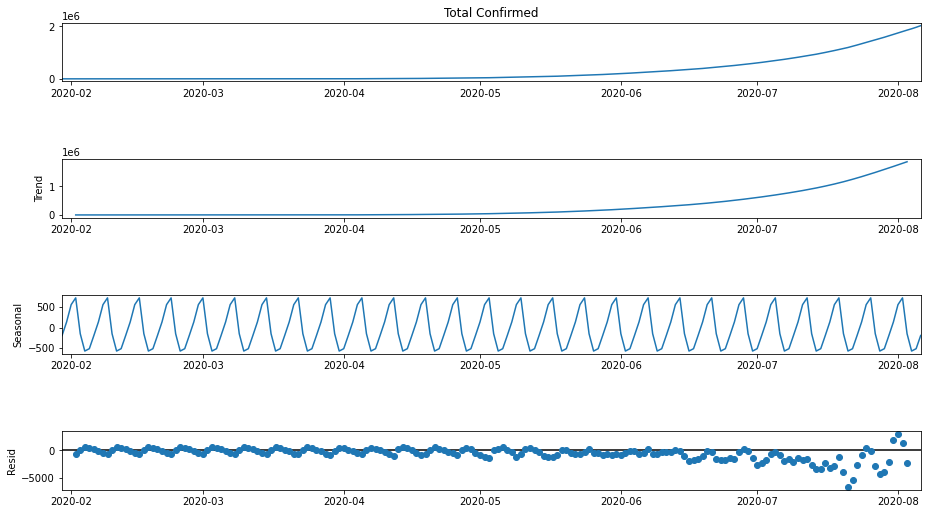

In [20]:
fig = result1.plot()
fig.set_size_inches(15,8)

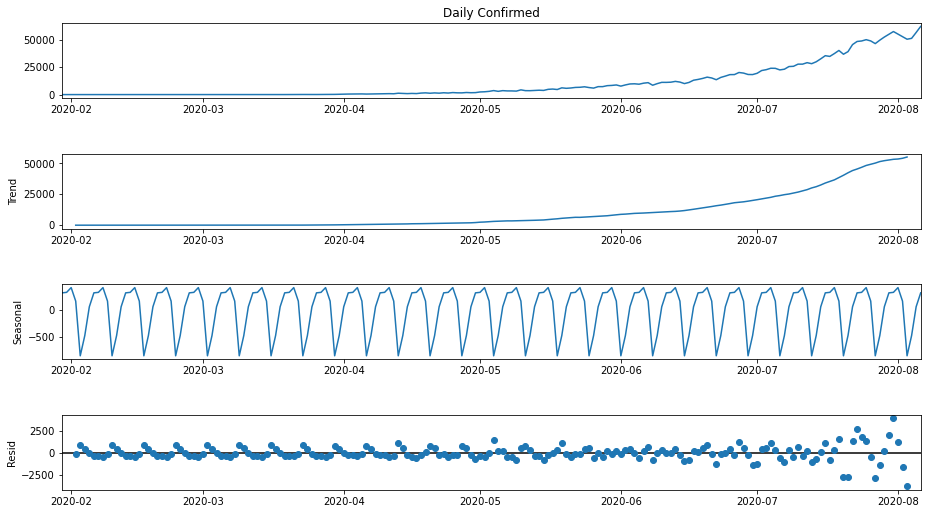

In [21]:
fig = result2.plot()
fig.set_size_inches(15,8)

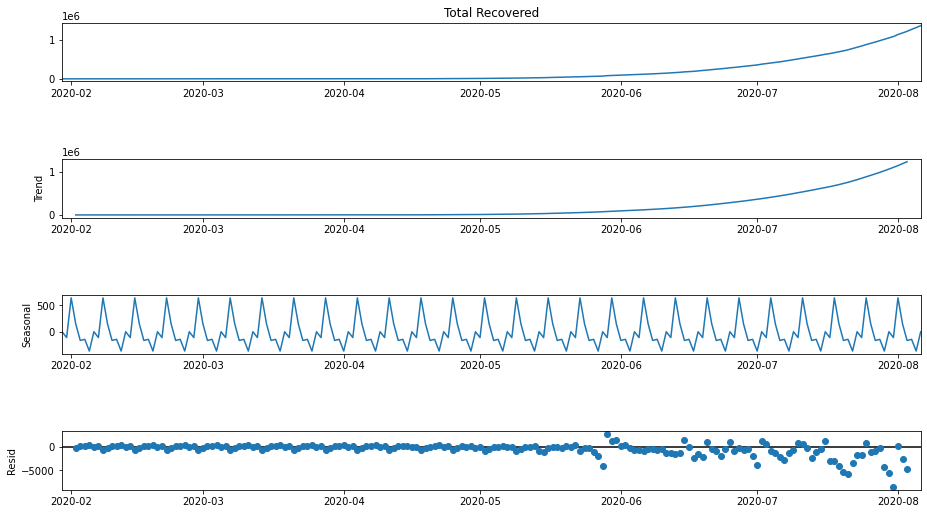

In [22]:
fig = result3.plot()
fig.set_size_inches(15,8)

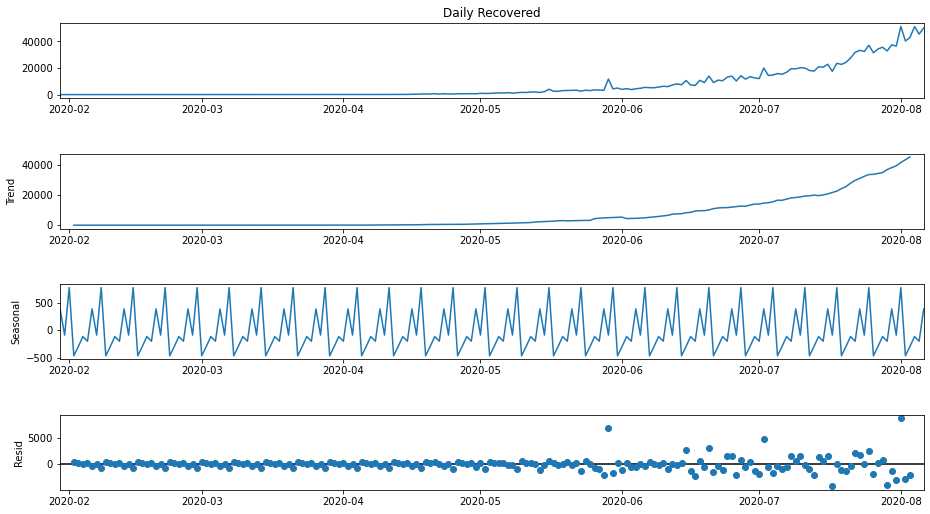

In [23]:
fig = result4.plot()
fig.set_size_inches(15,8)

## 6.Stationary Test

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
total_confirmed_to_fit = Total_confirmed_India.groupby('Date').sum()[Total_confirmed_India.groupby('Date').sum()['Total Confirmed']>=0]
daily_confirmed_to_fit = Daily_confirmed_India.groupby('Date').sum()[Daily_confirmed_India.groupby('Date').sum()['Daily Confirmed']>=0]
total_recovered_to_fit = Total_Recovered_India.groupby('Date').sum()[Total_Recovered_India.groupby('Date').sum()['Total Recovered']>=0]
daily_recovered_to_fit = Daily_Recovered_India.groupby('Date').sum()[Daily_Recovered_India.groupby('Date').sum()['Daily Recovered']>=0]


In [26]:
def adf_check(time_series):

    #Pass in a time series, returns ADF report
    result = adfuller(time_series)
    
    print('Augmented Dickey-Fuller Test:')
    
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [27]:
adf_check(total_confirmed_to_fit['Total Confirmed'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : 1.0951132592667092
p-value : 0.9951746996904941
#Lags Used : 14
Number of Observations Used : 175
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [28]:
adf_check(daily_confirmed_to_fit['Daily Confirmed'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : 4.576459292538224
p-value : 1.0
#Lags Used : 13
Number of Observations Used : 176
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [29]:
adf_check(total_recovered_to_fit['Total Recovered'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : 2.269294561442034
p-value : 0.9989348430184178
#Lags Used : 15
Number of Observations Used : 174
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [30]:
adf_check(daily_recovered_to_fit['Daily Recovered'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : 4.306772156564263
p-value : 1.0
#Lags Used : 14
Number of Observations Used : 175
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## 7. Seasonal ARIMA Model

In [31]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

## 7.1 Forecasting total confirmed cases in upcoming days 

In [32]:
model = SARIMAX(total_confirmed_to_fit['Total Confirmed'],order=(1,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

C:\Users\arnab\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\arnab\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\arnab\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\arnab\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                      SARIMAX Results                                       
Dep. Variable:                      Total Confirmed   No. Observations:                  190
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -1520.482
Date:                              Tue, 03 Nov 2020   AIC                           3048.963
Time:                                      17:13:17   BIC                           3061.668
Sample:                                  01-30-2020   HQIC                          3054.116
                                       - 08-06-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.004    224.304      0.000       0.991       1.009
ar.S.L12      -0.22

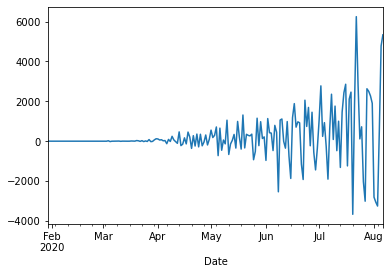

In [33]:
results.resid.plot()

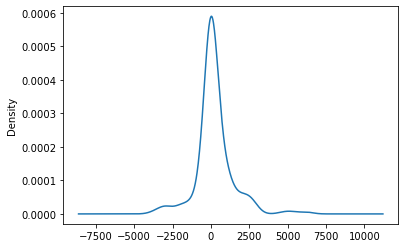

In [34]:
results.resid.plot(kind='kde')

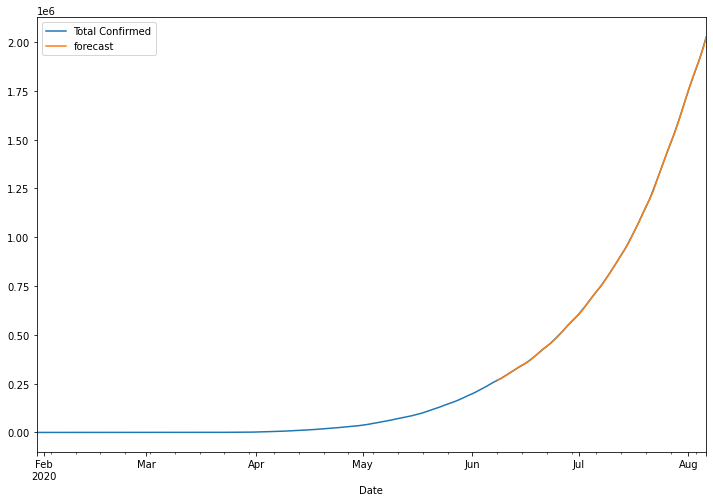

In [35]:
total_confirmed_to_fit['forecast'] = results.predict(start = 130, end= 190) 
total_confirmed_to_fit[['Total Confirmed','forecast']].plot(figsize=(12,8));

In [36]:
from pandas.tseries.offsets import DateOffset

In [37]:
n = 80
last_date = total_confirmed_to_fit.index[-1]

future_dates = [last_date+DateOffset(days=x) for x in range(1, n)]

In [38]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=total_confirmed_to_fit.columns)
future_df = pd.concat([total_confirmed_to_fit,future_dates_df])
total_confirmed_to_fit.tail()

,Total Confirmed,forecast
Date,,
2020-08-02,1804857,1.807915e+06
2020-08-03,1855345,1.858599e+06
2020-08-04,1906627,1.906085e+06
2020-08-05,1963253,1.958476e+06
2020-08-06,2025423,2.020087e+06


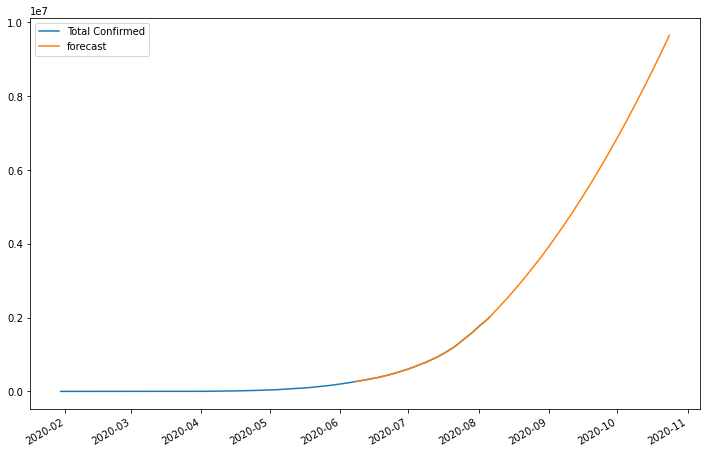

In [39]:
future_df['forecast'] = results.predict(start = 130, end = future_df.index[-1])  
future_df[['Total Confirmed', 'forecast']].plot(figsize=(12, 8))

## 7.2 Forecasting daily confirmed cases in upcoming days 

In [40]:
model = SARIMAX(daily_confirmed_to_fit['Daily Confirmed'],order=(1,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

C:\Users\arnab\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\arnab\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                      Daily Confirmed   No. Observations:                  190
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -1513.631
Date:                              Tue, 03 Nov 2020   AIC                           3035.262
Time:                                      17:13:19   BIC                           3047.966
Sample:                                  01-30-2020   HQIC                          3040.414
                                       - 08-06-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2797      0.043      6.493      0.000       0.195       0.364
ar.S.L12      -0.25

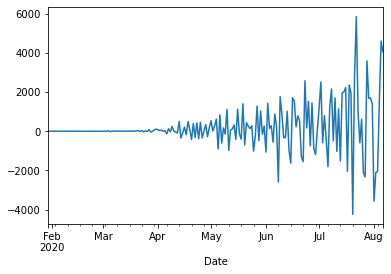

In [41]:
results.resid.plot()

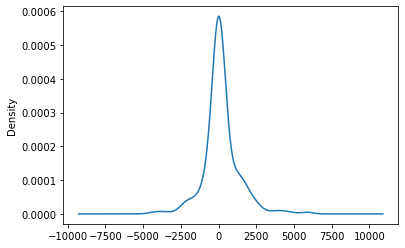

In [42]:
results.resid.plot(kind='kde')

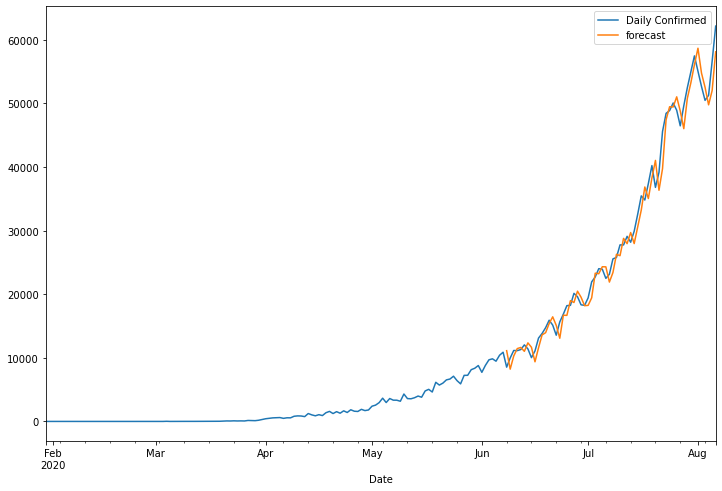

In [43]:
daily_confirmed_to_fit['forecast'] = results.predict(start = 130, end= 190) 
daily_confirmed_to_fit[['Daily Confirmed','forecast']].plot(figsize=(12,8));

In [44]:
from pandas.tseries.offsets import DateOffset

In [45]:
n = 80
last_date = daily_confirmed_to_fit.index[-1]
future_dates = [last_date+DateOffset(days=x) for x in range(1, n)]

future_dates_df = pd.DataFrame(index=future_dates[1:],columns=daily_confirmed_to_fit.columns)
future_df = pd.concat([daily_confirmed_to_fit,future_dates_df])
future_df.tail()


,Daily Confirmed,forecast
2020-10-20,NaN,NaN
2020-10-21,NaN,NaN
2020-10-22,NaN,NaN
2020-10-23,NaN,NaN
2020-10-24,NaN,NaN


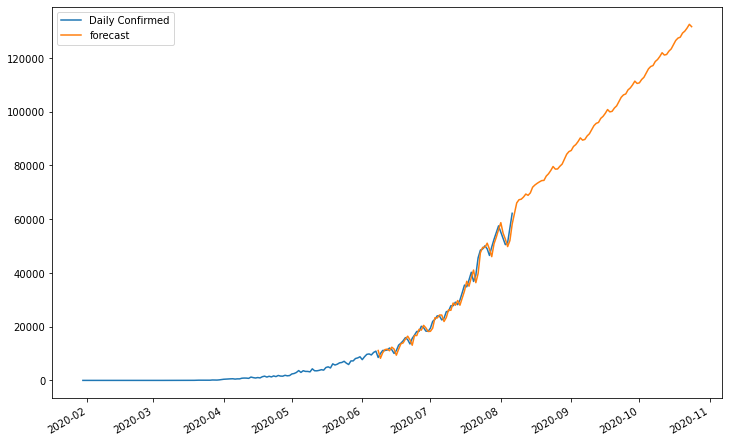

In [46]:
future_df['forecast'] = results.predict(start = 130, end = future_df.index[-1])  
future_df[['Daily Confirmed', 'forecast']].plot(figsize=(12, 8))

## 7.3 Forecasting total recovery in upcoming days 

In [47]:
model = SARIMAX(total_recovered_to_fit['Total Recovered'],order=(1,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

C:\Users\arnab\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\arnab\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\arnab\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\arnab\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                      SARIMAX Results                                       
Dep. Variable:                      Total Recovered   No. Observations:                  190
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -1638.831
Date:                              Tue, 03 Nov 2020   AIC                           3285.662
Time:                                      17:13:21   BIC                           3298.367
Sample:                                  01-30-2020   HQIC                          3290.815
                                       - 08-06-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9299      0.014     64.474      0.000       0.902       0.958
ar.S.L12      -0.65

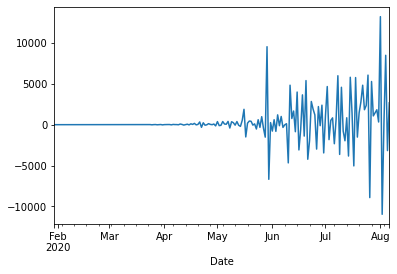

In [48]:
results.resid.plot()

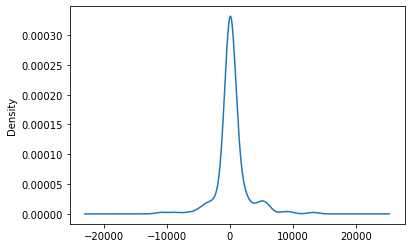

In [49]:
results.resid.plot(kind='kde')

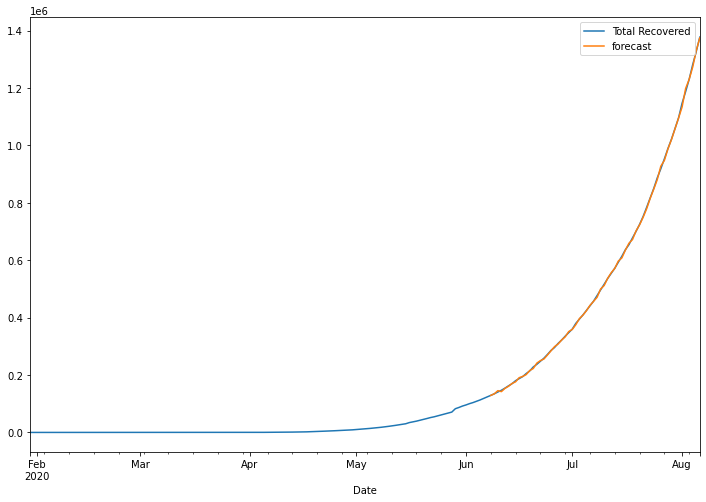

In [50]:
total_recovered_to_fit['forecast'] = results.predict(start = 130, end= 190) 
total_recovered_to_fit[['Total Recovered','forecast']].plot(figsize=(12,8));

In [51]:
n = 80
last_date = total_recovered_to_fit.index[-1]
future_dates = [last_date+DateOffset(days=x) for x in range(1, n)]

future_dates_df = pd.DataFrame(index=future_dates[1:],columns=total_recovered_to_fit.columns)
future_df = pd.concat([total_recovered_to_fit,future_dates_df])
future_df.tail()

,Total Recovered,forecast
2020-10-20,NaN,NaN
2020-10-21,NaN,NaN
2020-10-22,NaN,NaN
2020-10-23,NaN,NaN
2020-10-24,NaN,NaN


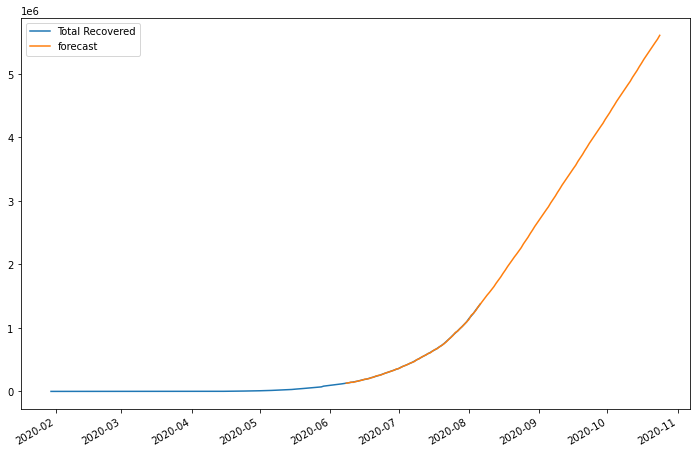

In [52]:
future_df['forecast'] = results.predict(start = 130, end = future_df.index[-1])  
future_df[['Total Recovered', 'forecast']].plot(figsize=(12, 8))

## 7.4 Forecasting daily recovery in upcoming days

In [53]:
model = SARIMAX(daily_recovered_to_fit['Daily Recovered'],order=(1,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

C:\Users\arnab\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\arnab\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                      Daily Recovered   No. Observations:                  190
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -1605.805
Date:                              Tue, 03 Nov 2020   AIC                           3219.610
Time:                                      17:13:23   BIC                           3232.314
Sample:                                  01-30-2020   HQIC                          3224.762
                                       - 08-06-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5362      0.038    -14.239      0.000      -0.610      -0.462
ar.S.L12       0.16

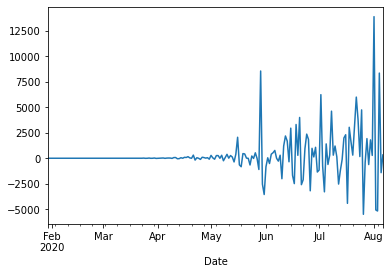

In [54]:
results.resid.plot()

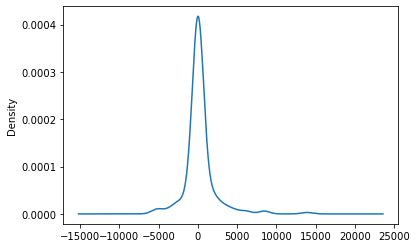

In [55]:
results.resid.plot(kind='kde')

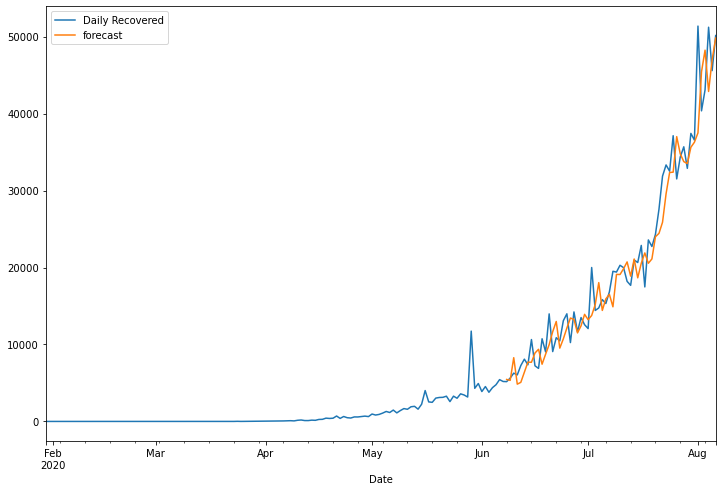

In [56]:
daily_recovered_to_fit['forecast'] = results.predict(start = 130, end= 190) 
daily_recovered_to_fit[['Daily Recovered','forecast']].plot(figsize=(12,8));

In [57]:
n = 80
last_date = daily_recovered_to_fit.index[-1]
future_dates = [last_date+DateOffset(days=x) for x in range(1, n)]

future_dates_df = pd.DataFrame(index=future_dates[1:],columns=daily_recovered_to_fit.columns)
future_df = pd.concat([daily_recovered_to_fit,future_dates_df])
future_df.tail()

,Daily Recovered,forecast
2020-10-20,NaN,NaN
2020-10-21,NaN,NaN
2020-10-22,NaN,NaN
2020-10-23,NaN,NaN
2020-10-24,NaN,NaN


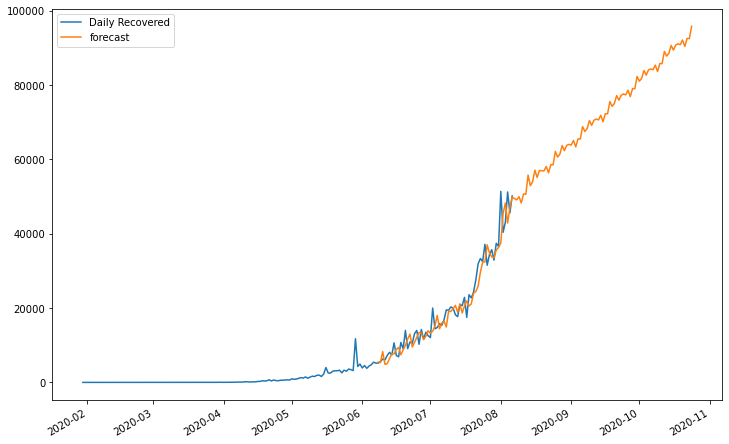

In [58]:
future_df['forecast'] = results.predict(start = 130, end = future_df.index[-1])  
future_df[['Daily Recovered', 'forecast']].plot(figsize=(12, 8))

##  8. Performance Evaluation

In [59]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

### 8.1 Mean Absolute Percentage Error


In [60]:
test1 = total_confirmed_to_fit.iloc[130:, :]
test2 = daily_confirmed_to_fit.iloc[130:, :]
test3 = total_recovered_to_fit.iloc[130:, :]
test4 = daily_recovered_to_fit.iloc[130:, :]
test1.head()

,Total Confirmed,forecast
Date,,
2020-06-08,266021,268561.098616
2020-06-09,276002,274939.976413
2020-06-10,287158,286044.093148
2020-06-11,298293,298300.933165
2020-06-12,309599,309949.449513


In [61]:
mape1 = np.mean(np.abs(test1['forecast']-test1['Total Confirmed'])/np.abs(test1['Total Confirmed']))
print('Accuracy of total confirmations forecast: ',100-(mape1*100))

Accuracy of total confirmations forecast:  99.7786465519674


In [62]:
mape2 = np.mean(np.abs(test2['forecast']-test2['Daily Confirmed'])/np.abs(test2['Daily Confirmed']))
print('Accuracy of daily confirmations forecast: ',100-(mape2*100))

Accuracy of daily confirmations forecast:  93.37483878422542


In [63]:
mape3 = np.mean(np.abs(test3['forecast']-test3['Total Recovered'])/np.abs(test3['Total Recovered']))
print('Accuracy of total recovery forecast: ',100-(mape3*100))

Accuracy of total recovery forecast:  99.27099011849319


In [64]:
mape4 = np.mean(np.abs(test4['forecast']-test4['Daily Recovered'])/np.abs(test4['Daily Recovered']))
print('Accuracy of daily recovery forecast: ',100-(mape4*100))


Accuracy of daily recovery forecast:  87.10281048121178


### 8.2 Root Mean squared error

In [65]:
realVals1 = test1['Total Confirmed']
predictedVals1 = test1['forecast']
mse1 = mean_squared_error(realVals1, predictedVals1)
rmse1 = sqrt(mse1)
print('Root mean square error of total confirmed cases forecast: ',rmse1)

Root mean square error of total confirmed cases forecast:  2125.1317359060663


In [66]:
realVals2 = test2['Daily Confirmed']
predictedVals2 = test2['forecast']
mse2 = mean_squared_error(realVals2, predictedVals2)
rmse2 = sqrt(mse2)
print('Root mean square error of daily confirmed cases forecast: ' ,rmse2)

Root mean square error of daily confirmed cases forecast:  2022.7478207589352


In [67]:
realVals3 = test3['Total Recovered']
predictedVals3 = test3['forecast']
mse3 = mean_squared_error(realVals3, predictedVals3)
rmse3 = sqrt(mse3)
print('Root mean square error of total recovery forecast: ',rmse3)

Root mean square error of total recovery forecast:  4053.037978541228


In [68]:
realVals4 = test4['Daily Recovered']
predictedVals4 = test4['forecast']
mse4 = mean_squared_error(realVals4, predictedVals4)
rmse4 = sqrt(mse4)
print('Root mean square error of daily recovery forecast: ', rmse4)

Root mean square error of daily recovery forecast:  3305.3554918793507


### 8.3 R2 score

In [69]:
r2_score_1= r2_score(realVals1, predictedVals1)
print('R2 score of total confirmed cases forecast: ', r2_score_1)


R2 score of total confirmed cases forecast:  0.9999827456330113


In [70]:
r2_score_2= r2_score(realVals2, predictedVals2)
print('R2 score of daily confirmed cases forecast: ', r2_score_2)

R2 score of daily confirmed cases forecast:  0.9833497185909372


In [71]:
r2_score_3= r2_score(realVals3, predictedVals3)
print('R2 score of total recovery forecast: ', r2_score_3)

R2 score of total recovery forecast:  0.9998682037756753


In [72]:
r2_score_4= r2_score(realVals4, predictedVals4)
print('R2 score of daily recovery forecast: ', r2_score_4)

R2 score of daily recovery forecast:  0.9304260281962908
